In [2]:
import glob
import os
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"]= "7"

In [3]:
import json

def parse_file_to_dicts(file_path):
    dicts = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('###Iter:'):
                # Extract the JSON string part
                json_str = line.split('::', 1)[1].strip()
                # Use json.loads to convert the string to a dictionary
                dict_data = json.loads(json_str.replace("'", "\""))
                dicts.append(dict_data)
    return dicts

In [4]:
def max_values_from_dicts(dicts):
    max_values = {}
    max_indices = {}

    for index, d in enumerate(dicts):
        for key, value in d.items():
            # Check if we need to update the maximum value and its index for each key
            if key not in max_values or value > max_values[key]:
                max_values[key] = value
                max_indices[key] = index

    # Merge the dictionaries to have the value and index in a tuple
    combined_max_values = {key: (max_values[key], max_indices[key]) for key in max_values}

    return combined_max_values

In [4]:
files = glob.glob("/app/nn-runtime-network/workdir/*/logs.txt")

In [5]:
max_vals={}
for f in files:
    try:
        mv = max_values_from_dicts(parse_file_to_dicts(f))
        if "opa_xla___default" in mv:
            max_vals[f.split("/")[-2]] = mv
    except:
        print("error:",f)

In [17]:
best_metrics = max_values_from_dicts(max_vals.values())
run_names = list(max_vals.keys())
{k:(v[0],run_names[v[1]]) for k,v in best_metrics.items()}

{'training_loss': (493486359.3808594, 'listmle_mse_graphsage'),
 'ordered_pair_accuracy': (0.7270833253860474,
  'listmle_graphsage_bestparams_layernorm'),
 'kendall_tau': (0.4541666666666666, 'listmle_graphsage_bestparams_layernorm'),
 'valid_loss': (16670388.712890625, 'listmle_mse_graphsage'),
 'opa_nlp___default': (0.7614583373069763,
  'listmle_graphsage_bestparams_layernorm'),
 'ktau_nlp___default': (0.5221152176852893,
  'listmle_graphsage_bestparams_layernorm'),
 'opa_nlp___random': (0.8729166388511658, 'listmle_graphsage_bestparams'),
 'ktau_nlp___random': (0.7458333333333333, 'listmle_graphsage_bestparams'),
 'opa_xla___default': (0.6428571343421936,
  'listmle_graphsage_bestparams_layer5'),
 'ktau_xla___default': (0.2857142857142857,
  'listmle_graphsage_bestparams_layer5'),
 'opa_xla___random': (0.6964285969734192,
  'listmle_graphsage_bestparams_layer5'),
 'ktau_xla___random': (0.3850754560807358,
  'listmle_graphsage_bestparams_layer5')}

In [1]:
import torch
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import sys
import glob
import os
import numpy as np
import json
from tqdm import tqdm
sys.path.append("../")
from ml_graph_timer.dataset.layout_dataset import NpzDataset,GraphCollator

from torch.utils.data import DataLoader
from configs.listmle_gsage_xla_fused import Configs
from ml_graph_timer.callbacks.evaluation import ordered_pair_accuracy,kendalltau

In [2]:

CFG = Configs()
CFG.valid_dataset.max_configs = 1024
CFG.valid_dataset.files = CFG.valid_dataset.files
dataloader = DataLoader(CFG.valid_dataset, batch_size=1, shuffle=False, collate_fn=CFG.dataloder_collate_val,num_workers=4,pin_memory=False)

length of train: 61, length of valid: 14, length of test: 16


In [3]:
CFG.train_dataset.max_configs = 1024
CFG.train_dataset.isvalid = True
CFG.train_dataset.files = CFG.train_dataset.files
dataloader = DataLoader(CFG.train_dataset, batch_size=1, shuffle=False, collate_fn=CFG.dataloder_collate_val,num_workers=4,pin_memory=False)

In [4]:
CFG.load_state_dict(os.path.join(CFG.OUTPUTDIR,"bestmodel_opa.pkl"))
model = CFG.model
model.eval()
model.cuda()
1

loading model checkpoint from epoch:  1536


RuntimeError: Error(s) in loading state_dict for LayoutGraphModel:
	Missing key(s) in state_dict: "node_features_mlp.shared.0.weight", "node_features_mlp.shared.0.bias", "node_features_mlp.first_step.shared.0.fc.weight", "node_features_mlp.first_step.shared.0.fc.bias", "node_features_mlp.first_step.shared.0.bn.bn.weight", "node_features_mlp.first_step.shared.0.bn.bn.bias", "node_features_mlp.first_step.shared.0.bn.bn.running_mean", "node_features_mlp.first_step.shared.0.bn.bn.running_var", "node_features_mlp.first_step.independ.0.fc.weight", "node_features_mlp.first_step.independ.0.fc.bias", "node_features_mlp.first_step.independ.0.bn.bn.weight", "node_features_mlp.first_step.independ.0.bn.bn.bias", "node_features_mlp.first_step.independ.0.bn.bn.running_mean", "node_features_mlp.first_step.independ.0.bn.bn.running_var", "node_features_mlp.first_step.independ.1.fc.weight", "node_features_mlp.first_step.independ.1.fc.bias", "node_features_mlp.first_step.independ.1.bn.bn.weight", "node_features_mlp.first_step.independ.1.bn.bn.bias", "node_features_mlp.first_step.independ.1.bn.bn.running_mean", "node_features_mlp.first_step.independ.1.bn.bn.running_var", "node_features_mlp.steps.0.fea_tran.shared.0.fc.weight", "node_features_mlp.steps.0.fea_tran.shared.0.fc.bias", "node_features_mlp.steps.0.fea_tran.shared.0.bn.bn.weight", "node_features_mlp.steps.0.fea_tran.shared.0.bn.bn.bias", "node_features_mlp.steps.0.fea_tran.shared.0.bn.bn.running_mean", "node_features_mlp.steps.0.fea_tran.shared.0.bn.bn.running_var", "node_features_mlp.steps.0.fea_tran.independ.0.fc.weight", "node_features_mlp.steps.0.fea_tran.independ.0.fc.bias", "node_features_mlp.steps.0.fea_tran.independ.0.bn.bn.weight", "node_features_mlp.steps.0.fea_tran.independ.0.bn.bn.bias", "node_features_mlp.steps.0.fea_tran.independ.0.bn.bn.running_mean", "node_features_mlp.steps.0.fea_tran.independ.0.bn.bn.running_var", "node_features_mlp.steps.0.fea_tran.independ.1.fc.weight", "node_features_mlp.steps.0.fea_tran.independ.1.fc.bias", "node_features_mlp.steps.0.fea_tran.independ.1.bn.bn.weight", "node_features_mlp.steps.0.fea_tran.independ.1.bn.bn.bias", "node_features_mlp.steps.0.fea_tran.independ.1.bn.bn.running_mean", "node_features_mlp.steps.0.fea_tran.independ.1.bn.bn.running_var", "node_features_mlp.steps.0.atten_tran.fc.weight", "node_features_mlp.steps.0.atten_tran.fc.bias", "node_features_mlp.steps.0.atten_tran.bn.bn.weight", "node_features_mlp.steps.0.atten_tran.bn.bn.bias", "node_features_mlp.steps.0.atten_tran.bn.bn.running_mean", "node_features_mlp.steps.0.atten_tran.bn.bn.running_var", "node_features_mlp.steps.1.fea_tran.shared.0.fc.weight", "node_features_mlp.steps.1.fea_tran.shared.0.fc.bias", "node_features_mlp.steps.1.fea_tran.shared.0.bn.bn.weight", "node_features_mlp.steps.1.fea_tran.shared.0.bn.bn.bias", "node_features_mlp.steps.1.fea_tran.shared.0.bn.bn.running_mean", "node_features_mlp.steps.1.fea_tran.shared.0.bn.bn.running_var", "node_features_mlp.steps.1.fea_tran.independ.0.fc.weight", "node_features_mlp.steps.1.fea_tran.independ.0.fc.bias", "node_features_mlp.steps.1.fea_tran.independ.0.bn.bn.weight", "node_features_mlp.steps.1.fea_tran.independ.0.bn.bn.bias", "node_features_mlp.steps.1.fea_tran.independ.0.bn.bn.running_mean", "node_features_mlp.steps.1.fea_tran.independ.0.bn.bn.running_var", "node_features_mlp.steps.1.fea_tran.independ.1.fc.weight", "node_features_mlp.steps.1.fea_tran.independ.1.fc.bias", "node_features_mlp.steps.1.fea_tran.independ.1.bn.bn.weight", "node_features_mlp.steps.1.fea_tran.independ.1.bn.bn.bias", "node_features_mlp.steps.1.fea_tran.independ.1.bn.bn.running_mean", "node_features_mlp.steps.1.fea_tran.independ.1.bn.bn.running_var", "node_features_mlp.steps.1.atten_tran.fc.weight", "node_features_mlp.steps.1.atten_tran.fc.bias", "node_features_mlp.steps.1.atten_tran.bn.bn.weight", "node_features_mlp.steps.1.atten_tran.bn.bn.bias", "node_features_mlp.steps.1.atten_tran.bn.bn.running_mean", "node_features_mlp.steps.1.atten_tran.bn.bn.running_var", "node_features_mlp.fc.weight", "node_features_mlp.fc.bias", "node_features_mlp.bn.weight", "node_features_mlp.bn.bias", "node_features_mlp.bn.running_mean", "node_features_mlp.bn.running_var". 
	Unexpected key(s) in state_dict: "node_features_mlp.0.weight", "node_features_mlp.0.bias", "node_features_mlp.2.weight", "node_features_mlp.2.bias", "node_features_mlp.3.weight", "node_features_mlp.3.bias", "node_features_mlp.5.weight", "node_features_mlp.5.bias". 

In [17]:
truths = []
predictions = []
# modeltype = CFG.valid_dataset.model_types
with torch.no_grad():
    for batch in tqdm(dataloader):
        out = model(batch["node_features"].cuda(), 
                                batch["node_config_features"].cuda(),  
                                batch["node_separation"].cuda(), 
                                batch["node_ops"].cuda(), 
                                batch["edges"].cuda(), 
                                batch["batches"].cuda()
                            ).detach().cpu()
        truths.append(batch["config_runtimes"])
        predictions.append(out)

100%|██████████| 14/14 [00:13<00:00,  1.07it/s]


In [24]:
ktaus = {}
for i,k in enumerate(CFG.valid_dataset.files):
    ktaus[k] = kendalltau(truths[i].numpy(),predictions[i].numpy())

In [25]:
ktaus

{'/app/dataset/various_splits/xla_fused/valid/xla___default___valid___bert_pretraining.4x4.fp16.npz': 0.26742744558951953,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___inception_v3_batch_128_train.npz': 0.4003969361609318,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___mlperf_bert_batch_24_2x2.npz': 0.21726190476190477,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___resnet50.4x4.fp16.npz': 0.4593253968253968,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___resnet_v1_50_official_batch_128_bf16.npz': 0.20094270030381337,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___tf2_bert_pretrain_dynamic_batch_size.npz': 0.40674603174603174,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___unet_3d.4x4.bf16.npz': -0.010928967142767166,
 '/app/dataset/various_splits/xla_fused/valid/xla___random___valid___bert_pretraining.4x4.fp16.npz': 0.7232142857142857,
 '/app/data

In [6]:
info1 = dict(np.load("/app/dataset/various_splits/xla_fused/train/default/magenta_dynamic.npz"))
info2 = dict(np.load("/app/dataset/various_splits/xla_fused/train/default/magenta.npz"))

In [10]:
info2["node_feat"].shape

(12062, 140)

In [9]:
info1["node_feat"].shape

(650, 140)

In [40]:
for i,(a,b) in enumerate(zip(info1["node_opcode"],info2["node_opcode"])):
    if a!=b:
        break

In [69]:
# mask = np.where(info1["node_feat"][:i]!=info2["node_feat"][:i])
# [x for x in zip(info1["node_feat"][:i][mask].astype(int),mask[1])]

In [78]:
np.unique(info1["node_feat"][:,15],return_counts=True)

(array([0., 1.], dtype=float32), array([5637,  498]))

In [23]:
np.mean(list(ktaus.values()))

0.27731020689211866

In [9]:
ktaus = {}
for i,k in enumerate(CFG.train_dataset.uniques):
    ktaus[k] = kendalltau(truths[i].numpy(),predictions[i].numpy())

In [23]:
difficult_models_train={
    'brax_es.npz': 0.31662534916480845,
    'magenta_dynamic.npz': 0.20987348698398284,
    'mlperf_maskrcnn_batch_2.npz': 0.03474401108295217,
    'mlperf_nmt_1_shard_batch_8.npz': 0.0,
    'mlperf_nmt_batch_8.npz': 0,
    'openai_v0_rnn_natural.npz': 0.28368816544899667,
    'openai_v0_rnn_optimized.npz': -0.1121616292029879,
    'unet3d.npz': 0.3132290987520023
}

In [21]:
valid_failed = {'/app/dataset/various_splits/xla_fused/valid/xla___default___valid___bert_pretraining.4x4.fp16.npz': 0.2013888888888889,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___inception_v3_batch_128_train.npz': 0.34383528718652506,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___mlperf_bert_batch_24_2x2.npz': 0.27947389231698194,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___resnet50.4x4.fp16.npz': 0.34085835829313527,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___resnet_v1_50_official_batch_128_bf16.npz': 0.005457702971214684,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___tf2_bert_pretrain_dynamic_batch_size.npz': 0.15132721874731625,
 '/app/dataset/various_splits/xla_fused/valid/xla___default___valid___unet_3d.4x4.bf16.npz': 0.17793249347480594,
 '/app/dataset/various_splits/xla_fused/valid/xla___random___valid___resnet_v1_50_official_batch_128_bf16.npz': 0.4097222222222222,
 '/app/dataset/various_splits/xla_fused/valid/xla___random___valid___unet_3d.4x4.bf16.npz': 0.26285734567142244}

In [60]:
idx = CFG.train_dataset.uniques.index('mlperf_nmt_1_shard_batch_8.npz')
data = CFG.train_dataset.load_files(idx)

In [ ]:
'mlperf_maskrcnn_batch_2.npz': 0.049094105404215646,
'mlperf_maskrcnn_batch_4.npz': 0.763161552221247,

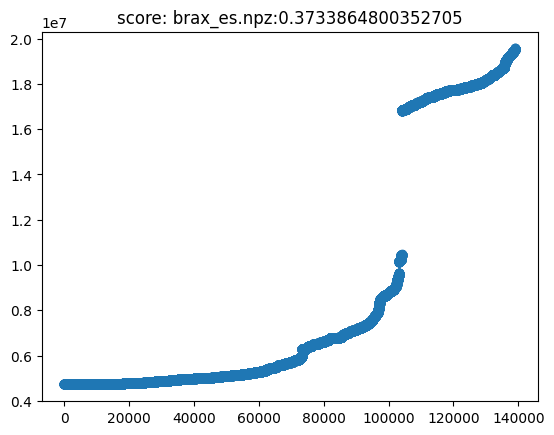

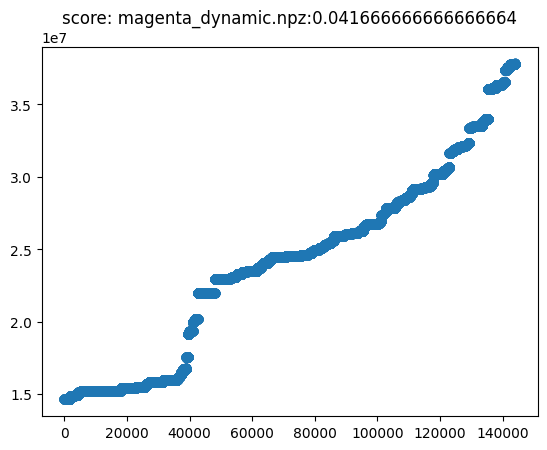

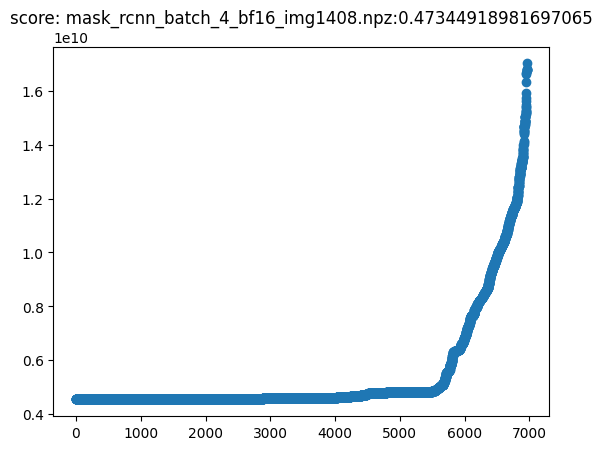

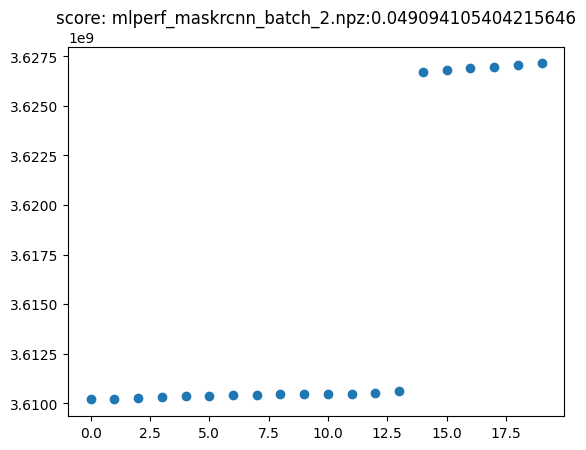

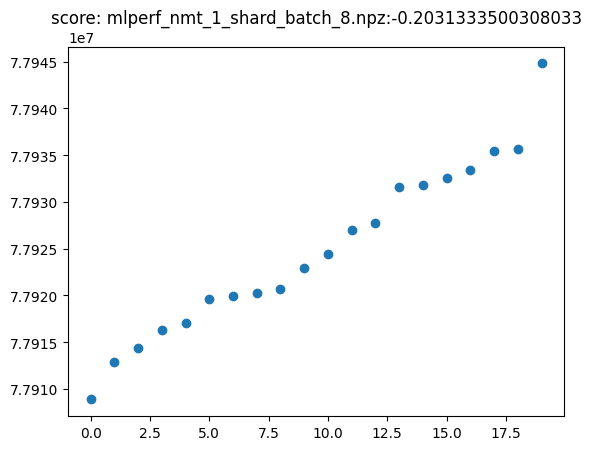

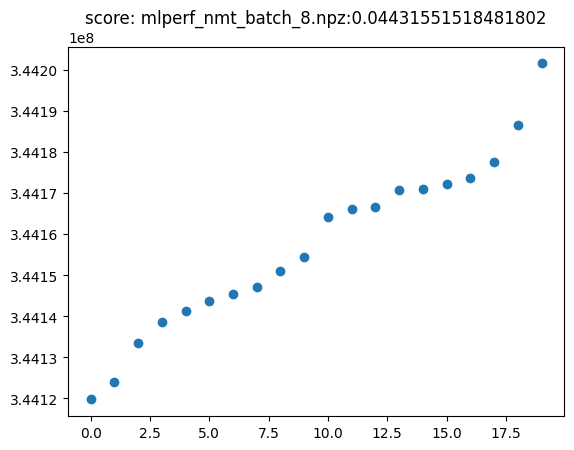

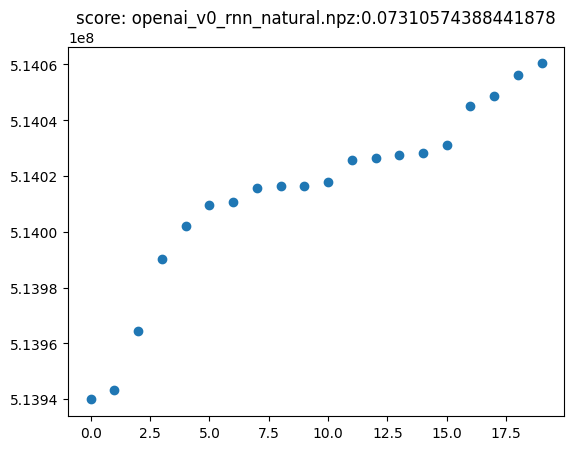

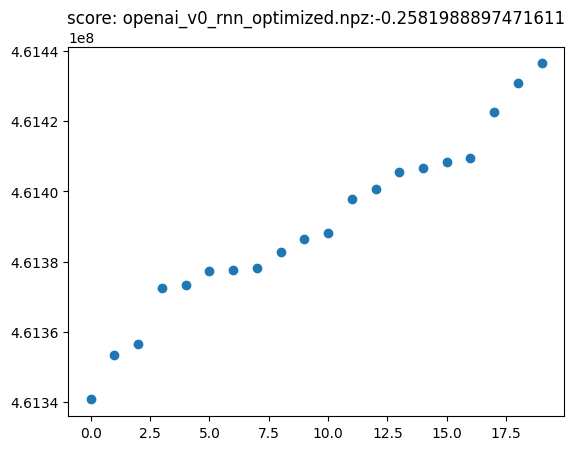

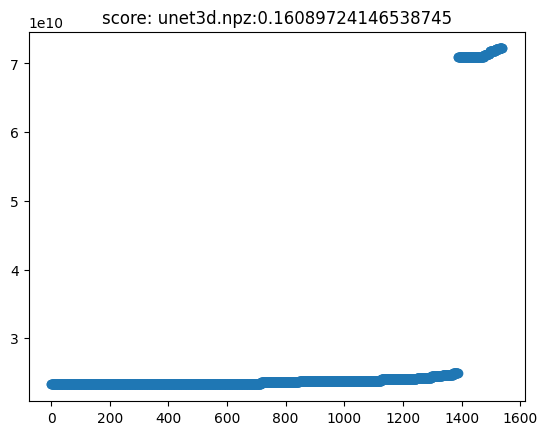

In [15]:
for k,v in difficult_models_train.items():
    idx = CFG.train_dataset.uniques.index(k)
    data = CFG.train_dataset.load_files(idx)
    x = np.unique(data["config_runtime"])
    plt.scatter(np.arange(len(x)),x)
    plt.title(f"score: {k}:{v}")
    plt.show()

array([910924357, 910943362, 925626911, 932713115, 917962568, 925657291,
       925651932, 932742872, 917955061, 910915768, 932728968, 917958292,
       917983382, 910938735, 910936840, 925653410, 925659664, 910920598,
       925629781, 925642107, 910929765, 910938147, 925629384, 917939417,
       925645078, 917948972, 910937407, 910909648, 917950755, 932741090,
       917950677, 925637188, 917979882, 917940751, 925652197, 910910947,
       932719384, 917976864, 917921920, 910906111, 925625577, 932751891,
       917938485, 917937200, 925623325, 917915621, 932758321, 917947432,
       932702271, 932721837, 910910364, 910896507, 917939397, 917930031,
       932701098, 917933524, 917917137, 910904140, 917938647, 932722320,
       932707502, 932724912, 917945434, 932727195, 925633239, 910894274,
       910918830, 925625441, 910911639, 910888087, 925626711, 910904479,
       932698754, 917892498, 910906615, 925643357, 932714581, 932709704,
       932721538, 910902995, 910910497, 932734964, 